# 2. Text

Nothing tells a story like... text! That might sound misplaced in a visualization library, but sometimes, text _is_ the bext tool to tell a story. It might even be the only available tool. That doesn't mean that you cannot create a rich narrative.

Multiplex comes with a powerful text visualization engine that does a lot of the work for you: it automatically positions and aligns text, and starts new lines where necessary. Your job is simply to tell a story.

In this notebook, we create text-only visualizations using the Wikipedia description of a football player: [Anthony Lopes](https://en.wikipedia.org/wiki/Anthony_Lopes). We will explore how the text visualization can be useful in natural language processing or text mining tasks, where you'd want to highlight certain information.

In the next tutorials, we will explore how text visualizations can also be added to any other visualization.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import nltk
import os
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

The simplest text visualization is a plain text one. As explained in [1. Getting started](https://github.com/NicholasMamo/multiplex-plot/blob/master/examples/1.%20Getting%20started.ipynb), all visualizations revolve around the Drawable class. The text visualization is no exception.

To draw a text visualization, use the `draw_text_annotation` function. The simplest use case is by providing text. We will also pass styling options to make the text stand out: we choose a font family, add some padding and justify the paragraph. Remember, Multiplex automatically arranges the text, starting new lines where necessary.

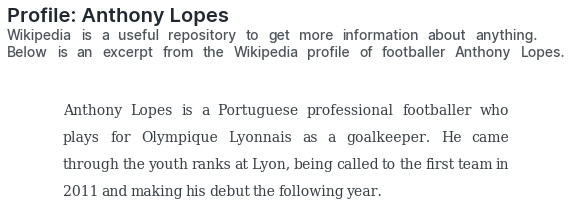

In [2]:
# import the Drawable class and set the style
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "multiplex.style"))

# prepare the data
paragraph = """Anthony Lopes is a Portuguese professional footballer who plays for Olympique Lyonnais as a goalkeeper.
               He came through the youth ranks at Lyon, being called to the first team in 2011 and making his debut the following year."""

# create a general style
style = { 'align': 'justify', 'fontfamily': 'serif', 'alpha': 0.9,
          'lineheight': 1.25, 'lpad': 0.1, 'rpad': 0.1 }

# draw the visualization
viz = drawable.Drawable(plt.figure(figsize=(10, 2)))
viz.draw_text_annotation(paragraph, **style)
viz.set_title('Profile: Anthony Lopes', loc='left')
viz.set_caption("""Wikipedia is a useful repository to get more information about anything.
                   Below is an excerpt from the Wikipedia profile of footballer Anthony Lopes.""")
viz.savefig('exports/2-simple-text.png', dpi=300, bbox_inches='tight')

One of the most essential tasks in natural language processing is named entity recognition, which commonly means extracting the names of organizations, countries and people from text. This paragraph of text contains important named entities related to our subject, Anthony Lopes.

In the next example, we highlight the named entities in the paragraph. To do that, we need to prepare the data. This means doing two things:

1. We need to extract the named entities from the text, and
2. We need to style them differently.

To extract named entities, we use [NLTK](http://nltk.org/). The process follows these steps:

1. Splits the text into tokens (individual words),
2. Tags its parts of speech (such as nouns and verbs), and
3. Extracts named entities.

In [3]:
tokens = nltk.word_tokenize(paragraph) # split the text into tokens
pos_tags = nltk.pos_tag(tokens) # tag the tokens with their part of speech
chunks = nltk.ne_chunk(pos_tags, binary=True) # extract the named entities

To highlight the named entities in the paragraph, we need to do two things:

1. Provide Multiplex with tokens instead of a chunk of text, and
2. Specify a style for the named entities.

In the next cell, we go through NLTK's chunks. Each chunk is tagged as either being a named entity or not. If the chunk is a named entity, we create a Python dictionary. The dictionary has two important keys:

1. The `style`, which affects how the named entity looks; and
2. The `text`, which is the actual word that Multiplex will draw.

The named entities' style overrides the general style. For example, if we specify a different color for a token, the general style's color will not be taken into account. If we do not specify a color for a token, the general style's color is used.

If the token is not a named entity, we add the text as a string. The normal words will use the general style.

In [4]:
tokens = [ ]
# go through each chunk and check if it is a named entity
for chunk in chunks:
    if type(chunk) == nltk.tree.Tree:
        # if a chunk is a named entity, add each word as a dictionary to the list of tokens
        for entity, _ in chunk:
            tokens.append({
                'style': { 'facecolor': '#FFBF00' },
                'text': entity,
            })
    else:
        # if a chunk is not a named entity, add the word as a string to the list of tokens
        token, _ = chunk
        tokens.append(token)

tokens[0]

{'style': {'facecolor': '#FFBF00'}, 'text': 'Anthony'}

So far, we have imported the necessary libraries, generated the data, specified a general style, and specified a particular style for named entities. All that remains is putting it all together.

Again, we call the `draw_text_annotation` function. The only thing that has changed is that instead of providing the paragraph, we provide a list of tokens, or words. Named entities are Python dictionaries with a style that highlights them. The other words use the general style.

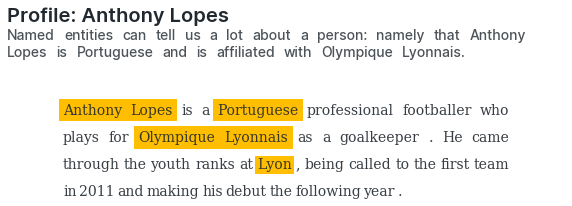

In [5]:
# reload the style
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "multiplex.style"))

# draw the visualization
viz = drawable.Drawable(plt.figure(figsize=(10, 2)))
viz.draw_text_annotation(tokens, **style)
viz.set_title('Profile: Anthony Lopes', loc='left')
viz.set_caption("""Named entities can tell us a lot about a person: namely that
                   Anthony Lopes is Portuguese and is affiliated with Olympique Lyonnais.""")
viz.savefig('exports/2-text-annotation.png', dpi=300, bbox_inches='tight')

Highlighting is a very common application for text visualizations. Sometimes, highlighting on its own does not cut it. Imagine that we want to go one step backwards: instead of highlighting the named entities, highlight the parts of speech, such as nouns and verbs.

The procedure is very similar. However, since we now want to highlight different types of words, we need to add a label to distinguish between nouns and verbs.

When Multiplex finds a label, it automatically draws a legend next to the line to help readers interpret the text. In the next example, we use Multiplex to highlight two types of parts of speech: nouns and verbs.

We generate the parts of speech tags like above to create Python dictionaries for the tokens. This time, the dictionaries contain the following:

1. The `style`, which affects how the token looks;
2. The `text`, which is the actual word that Multiplex will draw; and
3. The `label`, which tells Multiplex what part of speech the token is.

As we did before, if a word is neither a noun nor a verb, we do not need to create a dictionary. Instead, we just add the string to the list of tokens to draw.

In [6]:
tokens = nltk.word_tokenize(paragraph) # split the text into tokens
pos_tags = nltk.pos_tag(tokens) # tag the tokens with their part of speech

tokens = [ ]
# go through each chunk and check if it is a noun or a verb
tokens = [ ]
for text, pos in pos_tags:
    # if the token is a noun, highlight it with a yellow color
    if pos.startswith('N'):
        tokens.append({
            'label': 'Noun',
            'style': { 'facecolor': '#FFBF00' },
            'text': text,
        })
    # if the token is a noun, highlight it with a green color
    elif pos.startswith('V'):
        tokens.append({
            'label': 'Verb',
            'style': { 'facecolor': '#1DD300' },
            'text': text,
        })
    # add all other words as a string so they use the general style
    else:
        tokens.append(text)

tokens[0]

{'label': 'Noun', 'style': {'facecolor': '#FFBF00'}, 'text': 'Anthony'}

Again, we have already loaded Multiplex, generated the data, created a general style, and added a specific style for nouns and verbs. All that remains is that we call the `draw_text_annotation` function. The function automatically notices the labels and creates a legend out of them.

_Note: You can suppress the legend by passing `with_legend=False` to the `draw_text_annotation` function._

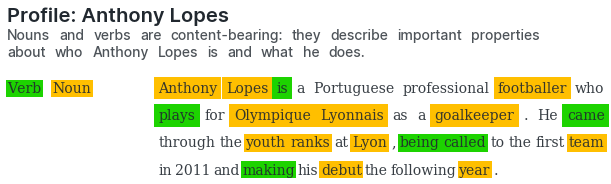

In [7]:
# reload the style
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "multiplex.style"))

# draw the visualization
viz = drawable.Drawable(plt.figure(figsize=(10, 2)))
viz.draw_text_annotation(tokens, **style)
viz.set_title('Profile: Anthony Lopes', loc='left')
viz.set_caption("""Nouns and verbs are content-bearing: they describe important properties
                   about who Anthony Lopes is and what he does.""")
viz.show()

There is a lot more you can do with text visualizations, but the principle remains the same: first gnereate the data, specify a general style, and then choose what you want to highlight and how you want to highlight it. You can learn more about what you can do with text visualizations, including functionality that was not covered in this tutorial, on [Multiplex's documentation site](https://nicholasmamo.github.io/multiplex-plot/text.html). You can continue learning about Multiplex, including how to annotate any matplotlib visualization, in the [time series tutorial](https://github.com/NicholasMamo/multiplex-plot/blob/master/examples/3.%20Time%20series.ipynb).